# Explore PISA-2012 Results
## by Viktor Begun

## Preliminary Wrangling

> [According to wikipedia:](https://en.wikipedia.org/wiki/Programme_for_International_Student_Assessment) "The Programme for International Student Assessment (PISA) is a worldwide study by the Organisation for Economic Co-operation and Development (OECD) in member and non-member nations intended to evaluate educational systems by measuring 15-year-old school pupils' scholastic performance on mathematics, science, and reading."

> In this project the data from 2012 provided by Udacity are analyzed. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from scipy.stats import norm
from statistics import mean

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Get the encoding
with open('pisa2012.csv.zip') as f:
    print(f)

<_io.TextIOWrapper name='pisa2012.csv.zip' mode='r' encoding='cp1252'>


In [96]:
# Read the data to the dataframe
# Enable a check of the datatype for columns with mixed types
pisa_2012_df = pd.read_csv('pisa2012.csv.zip',encoding='cp1252',low_memory=False, index_col=False)
pisa_2012_df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [97]:
# Get a general info
pisa_2012_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


**(!) Too many columns for a manual check!**

In [98]:
# Get the head of the table
pisa_2012_df.head()
#pisa_2012_df.tail()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [99]:
# Rename the `Unnamed: 0` 
pisa_2012_df = pisa_2012_df.rename(columns={'Unnamed: 0':'N_Pupil'})
pisa_2012_df.head()

,N_Pupil,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


**(?) Why many entries for a country?**

In [100]:
# Check the number of entries for each country
pisa_2012_df.CNT.value_counts().sort_index()

Albania                      4743
Argentina                    5908
Australia                   14481
Austria                      4755
Belgium                      8597
Brazil                      19204
Bulgaria                     5282
Canada                      21544
Chile                        6856
China-Shanghai               5177
Chinese Taipei               6046
Colombia                     9073
Connecticut (USA)            1697
Costa Rica                   4602
Croatia                      5008
Czech Republic               5327
Denmark                      7481
Estonia                      4779
Finland                      8829
Florida (USA)                1896
France                       4613
Germany                      5001
Greece                       5125
Hong Kong-China              4670
Hungary                      4810
Iceland                      3508
Indonesia                    5622
Ireland                      5016
Israel                       5055
Italy         

**(!) Each entry is an individual test of a pupil !**

In [7]:
# Get the encoding the 'dictionary' to the `pisa2012.csv` provided by Udacity
with open('pisadict2012.csv') as f:
    print(f)

<_io.TextIOWrapper name='pisadict2012.csv' mode='r' encoding='cp1252'>


In [101]:
# Read 'pisadict2012.csv' and get the header
pisa_2012_dict_df = pd.read_csv('pisadict2012.csv',encoding='cp1252')
pisa_2012_dict_df.head()

,Unnamed: 0,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code


In [102]:
# Rename the columns 
pisa_2012_dict_df = pisa_2012_dict_df.rename(columns={'Unnamed: 0':'Abbreviation','x':'Explanation'})
pisa_2012_dict_df.head()

,Abbreviation,Explanation
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code


In [103]:
# Print the whole dictionary
with pd.option_context('display.max_rows', 635):
    print(pisa_2012_dict_df)

    Abbreviation                                        Explanation
0            CNT                           Country code 3-character
1       SUBNATIO  Adjudicated sub-region code 7-digit code (3-di...
2        STRATUM  Stratum ID 7-character (cnt + region ID + orig...
3           OECD                                       OECD country
4             NC                       National Centre 6-digit Code
5       SCHOOLID  School ID 7-digit (region ID + stratum ID + 3-...
6        STIDSTD                                         Student ID
7        ST01Q01                                International Grade
8        ST02Q01                           National Study Programme
9        ST03Q01                                      Birth - Month
10       ST03Q02                                        Birth -Year
11       ST04Q01                                             Gender
12       ST05Q01                                   Attend <ISCED 0>
13       ST06Q01                                

In [104]:
# Print the first line of `pisa_2012_df` completely
with pd.option_context('display.max_columns', 636):
    print(pisa_2012_df[:1])

   N_Pupil      CNT  SUBNATIO  STRATUM      OECD       NC  SCHOOLID  STIDSTD  \
0        1  Albania     80000  ALB0006  Non-OECD  Albania         1        1   

   ST01Q01  ST02Q01  ST03Q01  ST03Q02 ST04Q01 ST05Q01  ST06Q01    ST07Q01  \
0       10      1.0        2     1996  Female    No        6.0  No, never   

     ST07Q02    ST07Q03 ST08Q01 ST09Q01  ST115Q01 ST11Q01 ST11Q02 ST11Q03  \
0  No, never  No, never  None    None         1.0     Yes     Yes     Yes   

  ST11Q04 ST11Q05 ST11Q06            ST13Q01 ST14Q01 ST14Q02 ST14Q03 ST14Q04  \
0     Yes     NaN     NaN  <ISCED level 3A>       No      No      No      No   

                              ST15Q01            ST17Q01 ST18Q01 ST18Q02  \
0  Other (e.g. home duties, retired)   <ISCED level 3A>      NaN     NaN   

  ST18Q03 ST18Q04                      ST19Q01          ST20Q01  \
0     NaN     NaN  Working part-time <for pay>  Country of test   

           ST20Q02          ST20Q03  ST21Q01               ST25Q01 ST26Q01  \
0 

In [105]:
pisa_2012_df.describe()

,N_Pupil,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,...,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,485490.000000,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,...,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,242745.500000,4.315457e+06,240.152197,6134.066201,9.813323,2.579260,6.558512,1996.070061,6.148963,1.265356,...,50.844201,51.020378,50.943149,50.685275,51.019842,50.540724,50.721164,40.013920,1.531189,0.140054
std,140149.035431,2.524434e+06,278.563016,6733.144944,3.734726,2.694013,3.705244,0.255250,0.970693,0.578992,...,120.684726,122.946533,121.170883,119.267686,122.981541,119.479516,119.799018,22.951264,0.539759,0.137864
min,1.000000,8.000000e+04,1.000000,1.000000,7.000000,1.000000,1.000000,1996.000000,4.000000,1.000000,...,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,1.000000,1.000000,0.000500
25%,121373.250000,2.030000e+06,61.000000,1811.000000,9.000000,1.000000,4.000000,1996.000000,6.000000,1.000000,...,4.660300,4.664800,4.643100,4.667000,4.675200,4.651850,4.660300,20.000000,1.000000,0.037800
50%,242745.500000,4.100000e+06,136.000000,3740.000000,10.000000,1.000000,7.000000,1996.000000,6.000000,1.000000,...,13.637700,13.698900,13.611700,13.672100,13.731100,13.582000,13.600200,40.000000,2.000000,0.145200
75%,364117.750000,6.880000e+06,291.000000,7456.000000,10.000000,3.000000,9.000000,1996.000000,7.000000,1.000000,...,41.233500,41.512500,41.695200,41.097300,41.189600,41.290925,41.356000,60.000000,2.000000,0.199900
max,485490.000000,8.580000e+06,1471.000000,33806.000000,96.000000,25.000000,99.000000,1997.000000,16.000000,4.000000,...,2476.566800,4155.283000,3743.450100,3232.163700,3904.868100,3607.478300,3412.174100,80.000000,3.000000,5.095500


In [106]:
# Print the description completely
with pd.option_context('display.max_columns', 636):
    print(pisa_2012_df.describe())

             N_Pupil      SUBNATIO       SCHOOLID        STIDSTD  \
count  485490.000000  4.854900e+05  485490.000000  485490.000000   
mean   242745.500000  4.315457e+06     240.152197    6134.066201   
std    140149.035431  2.524434e+06     278.563016    6733.144944   
min         1.000000  8.000000e+04       1.000000       1.000000   
25%    121373.250000  2.030000e+06      61.000000    1811.000000   
50%    242745.500000  4.100000e+06     136.000000    3740.000000   
75%    364117.750000  6.880000e+06     291.000000    7456.000000   
max    485490.000000  8.580000e+06    1471.000000   33806.000000   

             ST01Q01        ST02Q01        ST03Q01        ST03Q02  \
count  485490.000000  485438.000000  485490.000000  485490.000000   
mean        9.813323       2.579260       6.558512    1996.070061   
std         3.734726       2.694013       3.705244       0.255250   
min         7.000000       1.000000       1.000000    1996.000000   
25%         9.000000       1.000000       

In [107]:
# Obtain all different indicator names measured with `plausible values`.
# Print the names containing PV1 in the indicator name.
pv_names = [col for col in pisa_2012_df if col.startswith('PV1')]
print(pv_names)

['PV1MATH', 'PV1MACC', 'PV1MACQ', 'PV1MACS', 'PV1MACU', 'PV1MAPE', 'PV1MAPF', 'PV1MAPI', 'PV1READ', 'PV1SCIE']


In [108]:
# Print the explanations for the PV1 names
with pd.option_context('display.max_colwidth', 100):
    for name in pv_names:
        print(pisa_2012_dict_df.loc[pisa_2012_dict_df.Abbreviation == name])

    Abbreviation                       Explanation
500      PV1MATH  Plausible value 1 in mathematics
    Abbreviation  \
505      PV1MACC   

                                                                  Explanation  
505  Plausible value 1 in content subscale of math - Change and Relationships  
    Abbreviation                                               Explanation
510      PV1MACQ  Plausible value 1 in content subscale of math - Quantity
    Abbreviation  \
515      PV1MACS   

                                                         Explanation  
515  Plausible value 1 in content subscale of math - Space and Shape  
    Abbreviation  \
520      PV1MACU   

                                                              Explanation  
520  Plausible value 1 in content subscale of math - Uncertainty and Data  
    Abbreviation                                             Explanation
525      PV1MAPE  Plausible value 1 in process subscale of math - Employ
    Abbreviation         

**(!) The `MATH` scale has a separate measure and 7 subscale measures. The READ and SCIE measures have no subscale measures.**

### What is the structure of your dataset?

The dataset consists of two tables. 
- The `pisa2012.csv` contains individual test results of pupils from different countries. The results are measured by more than 600 indicators.
- The `pisadict2012.csv` contains short decodings of the indicator abbreviations from `pisa2012.csv`. 

Some of the indicators are unique and self explanatory, like SCHOOLID, while others are non-intuitive and require a separate explanation, like `ATTLNACT` - Attitude towards School: Learning Activities.

Many indicators have several levels, which are encoded with the letter Q and a two digit number at the end of the code, like

ST77Q01	Math Teaching - Teacher shows interest

ST77Q02	Math Teaching - Extra help

ST77Q04	Math Teaching - Teacher helps

ST77Q05	Math Teaching - Teacher continues

ST77Q06	Math Teaching - Express opinions

### What is/are the main feature(s) of interest in your dataset?

The most interesting features are the dependance of performance on mathematics, science, and reading on other measured factors. They correspond to the `PV%MATH`, `PV%READ` and `PV%SCIE` indicators, where the `%` sign stays for a number from 1 to 5.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The performance is measured using the so-called `plausible values`, which have 5 levels. They start with the `PV` letters in the index and contain the words `Plausible value` in the description. 
 
It is interesting to check correlations between these indicators.

**(!) In order to avoid averaging between different cultures and educational systems, I limit the analysis only to one country and choose Germany.**

In [109]:
# Select Germany to a separate dataframe
pisa_2012_Germany_df = pisa_2012_df.loc[pisa_2012_df.CNT == 'Germany']
pisa_2012_Germany_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5001 entries, 133101 to 138101
Columns: 636 entries, N_Pupil to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 24.3+ MB


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

According to the [oecd-ilibrary.org:](https://www.oecd-ilibrary.org/docserver/9789264056275-7-en.pdf) "...Population statistics should be estimated **using each plausible value separately**. 
The reported population statistic is then the average of each plausible value statistic. For instance, if one is
interested in the correlation coefficient between the social index and the reading performance in PISA, then
five correlation coefficients should be computed and then averaged.
**Plausible values should never be averaged at the student level**..."

**(!) The above is valid if one is interested in correlations. For mean values one can add the `plausible values`.**

In [112]:
# Add the new columns to the `pisa_2012_Germany_df` with the average PVMATH, PVREAD and PVSCIE
pd.options.mode.chained_assignment = None  # Disable a warning
pisa_2012_Germany_df['PV_MATH'] = (pisa_2012_Germany_df.PV1MATH + pisa_2012_Germany_df.PV2MATH + pisa_2012_Germany_df.PV3MATH + pisa_2012_Germany_df.PV4MATH + pisa_2012_Germany_df.PV5MATH)/5
pisa_2012_Germany_df['PV_READ'] = (pisa_2012_Germany_df.PV1READ + pisa_2012_Germany_df.PV2READ + pisa_2012_Germany_df.PV3READ + pisa_2012_Germany_df.PV4READ + pisa_2012_Germany_df.PV5READ)/5
pisa_2012_Germany_df['PV_SCIE'] = (pisa_2012_Germany_df.PV1SCIE + pisa_2012_Germany_df.PV2SCIE + pisa_2012_Germany_df.PV3SCIE + pisa_2012_Germany_df.PV4SCIE + pisa_2012_Germany_df.PV5SCIE)/5

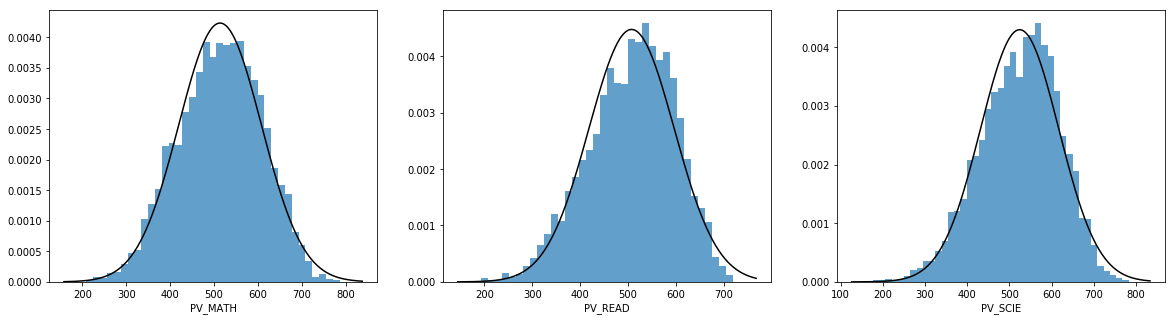

In [21]:
# Plot the PVMATH, PVREAD and PVSCIE distributions
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sb.distplot(pisa_2012_Germany_df.PV_MATH, fit=norm, fit_kws = {'color':'k'}, kde=False, hist_kws = {'alpha':0.7})
plt.xlabel('PV_MATH')

plt.subplot(1,3,2)
sb.distplot(pisa_2012_Germany_df.PV_READ, fit=norm, fit_kws = {'color':'k'}, kde=False, hist_kws = {'alpha':0.7})
plt.xlabel('PV_READ')

plt.subplot(1,3,3)
sb.distplot(pisa_2012_Germany_df.PV_SCIE, fit=norm, fit_kws = {'color':'k'}, kde=False, hist_kws = {'alpha':0.7})
plt.xlabel('PV_SCIE');

**(!) The PV_READ and PV_SCIE distributions are skewed. There is more pupils successfull in reading and science than a Gaussian distribution would predict.**

**(?) Which indicators have the largest correlation with `MATH`?**

As already mentioned, "...for example, if one is interested in the correlation coefficient between the social index and the reading performance in PISA, then five correlation coefficients should be computed and then averaged, see [oecd-ilibrary.org](https://www.oecd-ilibrary.org/docserver/9789264056275-7-en.pdf).

In [217]:
# Calculate parwise correlations with PV%MATH
# `filter`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html
PV_columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']
pisa_2012_Germany_df_corr = pisa_2012_Germany_df.corr().filter(PV_columns).dropna()
# Add the average MATH_corr column
pisa_2012_Germany_df_corr['MATH_corr'] = (pisa_2012_Germany_df_corr.PV1MATH + 
                                          pisa_2012_Germany_df_corr.PV2MATH +
                                          pisa_2012_Germany_df_corr.PV3MATH + 
                                          pisa_2012_Germany_df_corr.PV4MATH + 
                                          pisa_2012_Germany_df_corr.PV5MATH)/5
# Drop the PV%MATH columns
pisa_2012_Germany_df_corr = pisa_2012_Germany_df_corr.drop(columns = PV_columns)
pisa_2012_Germany_df_corr

,MATH_corr
N_Pupil,-0.036658
SCHOOLID,-0.037144
STIDSTD,-0.036658
ST01Q01,0.458317
ST02Q01,-0.055447
ST03Q01,-0.074735
ST06Q01,-0.252012
ST115Q01,-0.047914
ST21Q01,-0.211742
ST26Q15,-0.143210


In [229]:
# Select the indicators with largest positive correlations with MATH scores
pisa_2012_Germany_df_corr_pos = pisa_2012_Germany_df_corr[pisa_2012_Germany_df_corr['MATH_corr'] > 0.25] 
# The same for negative correlation
pisa_2012_Germany_df_corr_neg = pisa_2012_Germany_df_corr[pisa_2012_Germany_df_corr['MATH_corr'] < -0.25] 
#pisa_2012_Germany_df_corr_pos.MATH_corr.sort_values()

**(!) Get the column names which give the largest correlations, but are not the `plausible values` or similar indicators which directly measure mathematic abilities**.

In [228]:
# Increase the output string length
with pd.option_context('display.max_colwidth', 100):
# Get the names of the indexes with highest correlation
    for row in pisa_2012_Germany_df_corr_pos.itertuples():#iterrows():#items():
        if not (row.Index.startswith('PV') | 
                row.Index.startswith('FAM') | 
                row.Index.startswith('MATH') | 
               (row.Index == 'SCMAT') | 
               (row.Index == 'ANCSCMAT') | 
               (row.Index == 'ANCSCMAT') |
               (row.Index == 'EXPUREM') |
               (row.Index == 'ANCINTMAT')
               ):
            name = row.Index
            print(name)
            print(pisa_2012_dict_df.loc[pisa_2012_dict_df.Abbreviation == name].Explanation.to_string())

ST01Q01
7    International Grade
GRADE
411    Grade compared to modal grade in country
BFMJ2
417    Father SQ ISEI
BMMJ1
418    Mother SQ ISEI
ESCS
428    Index of economic, social and cultural status
HISEI
439    Highest parental occupational status
HOMEPOS
440    Home Possessions
OPENPS
470    Openness for Problem Solving
PARED
472    Highest parental education in years


### Good notes in Math correlate with:
- overall good notes both in Germany and on the international level
- [socio-economical status of parents and of the family:](https://stats.oecd.org/glossary/detail.asp?ID=5405)
    - highest parental occupational status
        - Father Socio-Economic Index of Occupational Status
        - Mother Socio-Economic Index of Occupational Status
    
- home possessions from a desk to study at to cars and musical instruments
- openness for problem solving
- highest parental education in years

[See Procedures and Construct Validation of Context Questionnaire Data](https://www.oecd.org/pisa/sitedocument/PISA-2015-Technical-Report-Chapter-16-Procedures-and-Construct-Validation-of-Context-Questionnaire-Data.pdf) for the explanation of abbreviations.

In [230]:
# Increase the output string length
with pd.option_context('display.max_colwidth', 100):
# Get the names of the indexes with highest correlation
    for row in pisa_2012_Germany_df_corr_neg.itertuples():#iterrows():#items():
        if not (row.Index.startswith('PV') #| 
#                row.Index.startswith('FAM') | 
#                row.Index.startswith('MATH') | 
#               (row.Index == 'SCMAT') | 
#               (row.Index == 'ANCSCMAT') | 
#               (row.Index == 'ANCSCMAT') |
#               (row.Index == 'EXPUREM') |
#               (row.Index == 'ANCINTMAT')
               ):
            name = row.Index
            print(name)
            print(pisa_2012_dict_df.loc[pisa_2012_dict_df.Abbreviation == name].Explanation.to_string())

ST06Q01
13    Age at <ISCED 1>
ST70Q01
174    No of <class period> p/wk - <test lang>
IC05Q01
303    Internet at School
IC06Q01
304    Internet out-of-school - Weekday
ANXMAT
413    Mathematics Anxiety
TCHBEHSO
480    Teacher Behaviour: Student Orientation


### Good notes in Math anti-correlate with:
- Age at [ISCED level 1](https://en.wikipedia.org/wiki/International_Standard_Classification_of_Education), i.e. age of starting a school.
- Average time per week on language
- Internet use at school on a typical weekday
- Internet use outside of school on a typical weekday
- Mathematics anxiety
- Teacher Behaviour: Student Orientation
    
[See Pisa 2012 Technical Report](https://www.oecd.org/pisa/pisaproducts/PISA%202012%20Technical%20Report_ANNEX%20B%20%E2%80%93%20CONTRAST%20CODING%20USED%20IN%20CONDITIONING.pdf) for the explanation of abbreviations.

**(!) It is surprising to find that "student orientation" of a teacher anti-correlates with the grade. However, the dependance may be so that weaker pupils require more attention of a teacher.**

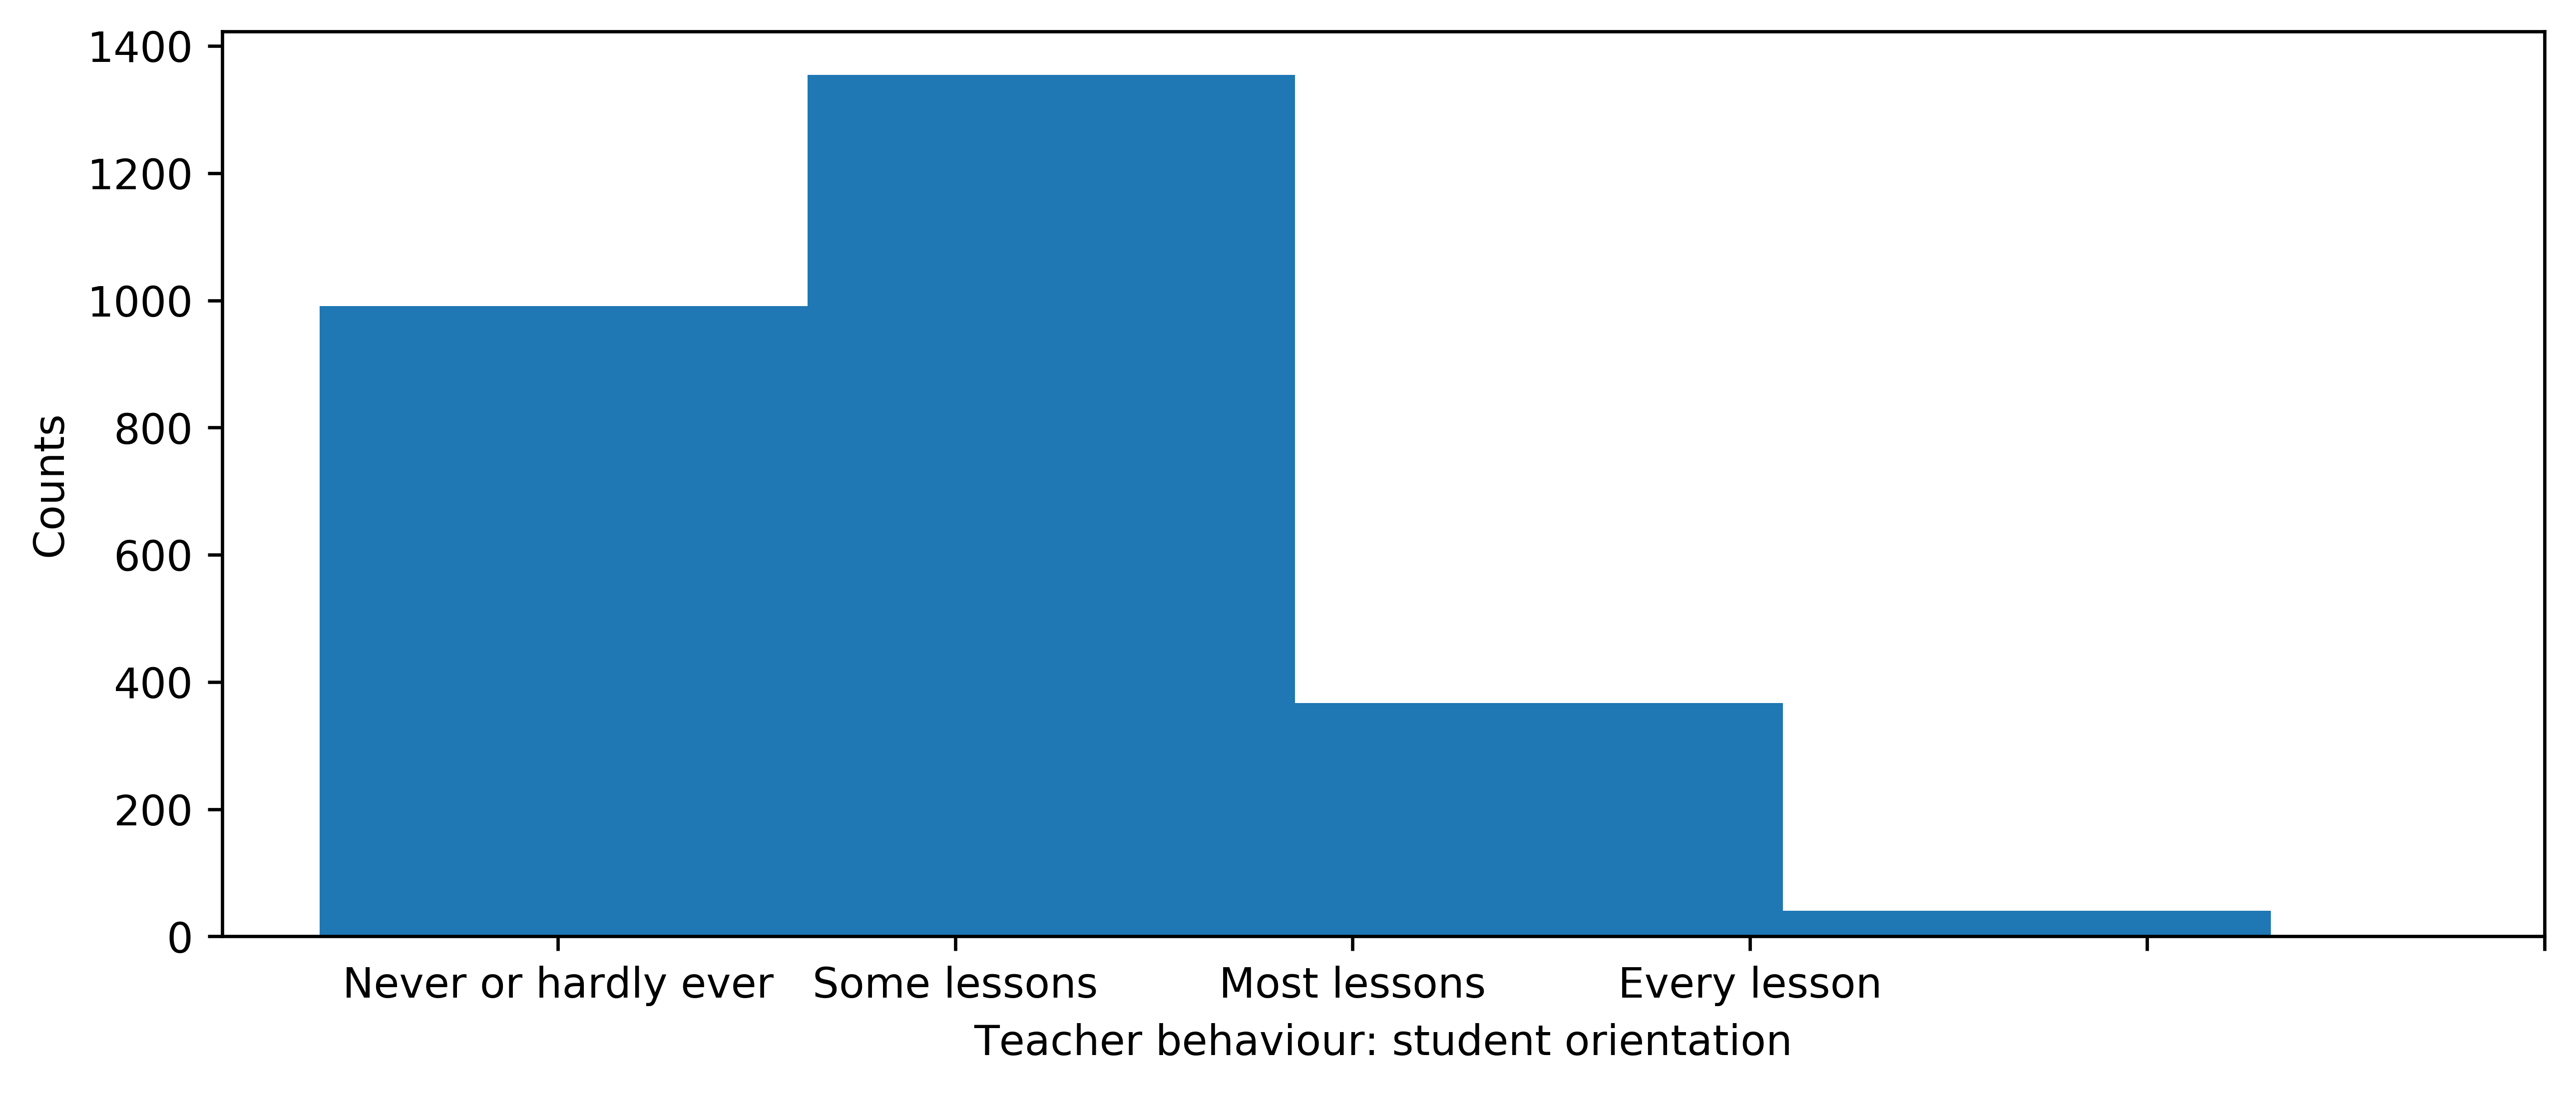

In [305]:
plt.figure(figsize = [10, 4], dpi = 600)
plt.hist(pisa_2012_Germany_df.TCHBEHSO.dropna(), bins =4, alpha = 1)
#plt.legend(prop={'size': 10})
plt.xticks(np.arange(-1,5), ('Never or hardly ever', 'Some lessons', 'Most lessons', 'Every lesson'))
plt.xlabel('Teacher behaviour: student orientation');
plt.ylabel('Counts');

**(!) It looks like teachers mostly ignore students.**

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The `PV_READ` and `PV_SCIE` distributions are skewed. 
- The scores are gender neutral for the `PV_SCIE` indicator. Girls have better scores in `PV_READ`, while boys have slightly better scores in `PV_MATH`. However, the difference is less than the variance. Therefore, one can say that there is practically  no difference in scores for girls and boys.

- There is no unusual points, no outliers, no need to perform any transformations apart from averaging.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Since `PV_READ` and `PV_SCIE` distributions are skewed, there is more pupils successfull in reading and science than a Gaussian distribution would predict. However, it also means that there is a long left tail, or a considarable number of pupils, who have difficulties getting `PV_READ` and `PV_SCIE` scores.
- The dataset is tidy and clean. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

**(?) Is there dependence of scores on gender?**

In [22]:
# Split the dataframe by gender
pisa_2012_Germany_fem_df = pisa_2012_df.loc[(pisa_2012_df.CNT == 'Germany') & (pisa_2012_df.ST04Q01 == 'Female')]
pisa_2012_Germany_mal_df = pisa_2012_df.loc[(pisa_2012_df.CNT == 'Germany') & (pisa_2012_df.ST04Q01 == 'Male')]

print(pisa_2012_Germany_fem_df.info())
print(pisa_2012_Germany_mal_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462 entries, 133101 to 138101
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 12.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2539 entries, 133103 to 138100
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 12.3+ MB
None


**(!) 2462 female entries + 2539 male entries = 5001 entries. The set is complete.**

In [23]:
# Get the average PVMATH, PVREAD and PVSCIE for different gender
PV_MATH_fem = (pisa_2012_Germany_fem_df.PV1MATH + pisa_2012_Germany_fem_df.PV2MATH + pisa_2012_Germany_fem_df.PV3MATH + pisa_2012_Germany_fem_df.PV4MATH + pisa_2012_Germany_fem_df.PV5MATH)/5
PV_MATH_mal = (pisa_2012_Germany_mal_df.PV1MATH + pisa_2012_Germany_mal_df.PV2MATH + pisa_2012_Germany_mal_df.PV3MATH + pisa_2012_Germany_mal_df.PV4MATH + pisa_2012_Germany_mal_df.PV5MATH)/5

PV_READ_fem = (pisa_2012_Germany_df.PV1READ + pisa_2012_Germany_df.PV2READ + pisa_2012_Germany_df.PV3READ + pisa_2012_Germany_df.PV4READ + pisa_2012_Germany_df.PV5READ)/5
PV_READ_mal = (pisa_2012_Germany_mal_df.PV1READ + pisa_2012_Germany_mal_df.PV2READ + pisa_2012_Germany_mal_df.PV3READ + pisa_2012_Germany_mal_df.PV4READ + pisa_2012_Germany_mal_df.PV5READ)/5

PV_SCIE_fem = (pisa_2012_Germany_fem_df.PV1SCIE + pisa_2012_Germany_fem_df.PV2SCIE + pisa_2012_Germany_fem_df.PV3SCIE + pisa_2012_Germany_fem_df.PV4SCIE + pisa_2012_Germany_fem_df.PV5SCIE)/5
PV_SCIE_mal = (pisa_2012_Germany_mal_df.PV1SCIE + pisa_2012_Germany_mal_df.PV2SCIE + pisa_2012_Germany_mal_df.PV3SCIE + pisa_2012_Germany_mal_df.PV4SCIE + pisa_2012_Germany_mal_df.PV5SCIE)/5

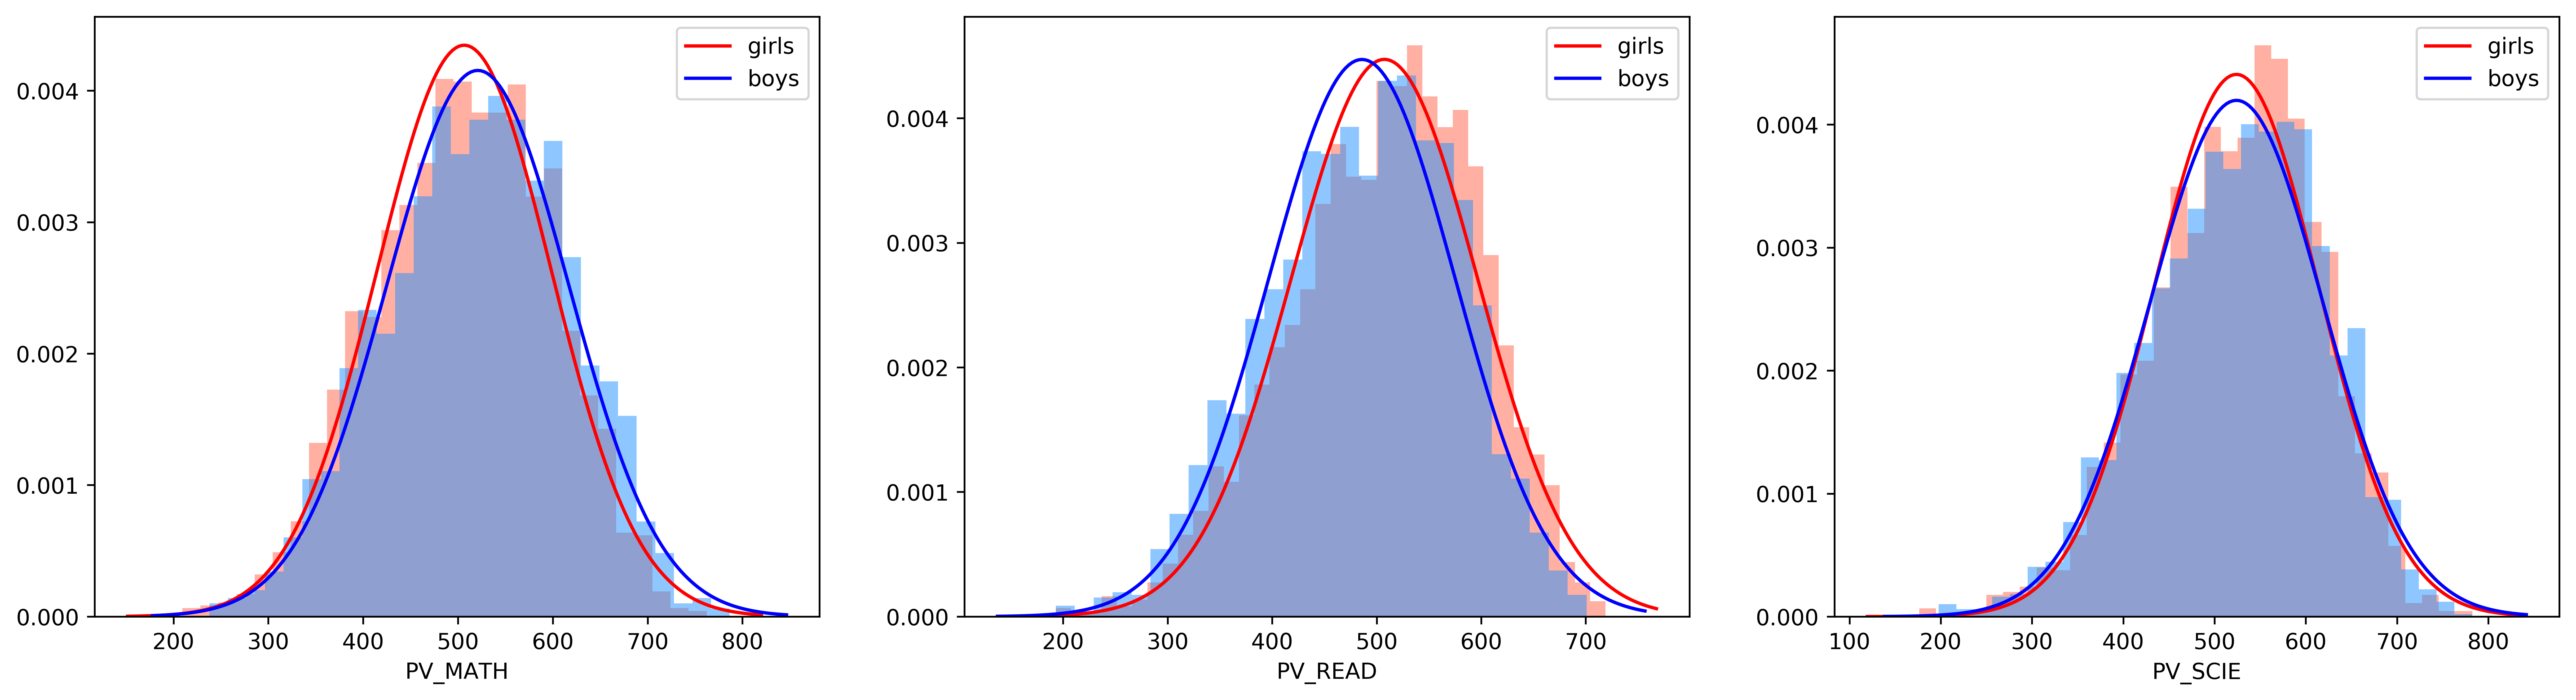

In [47]:
# Plot the PVMATH, PVREAD and PVSCIE distributions
plt.figure(figsize=[20,5], dpi=600)

plt.subplot(1,3,1)

sb.distplot(PV_MATH_fem, fit=norm, fit_kws = {'color':'r', 'label': 'girls'}, kde=False, hist_kws = {'alpha':0.5,'color':'tomato'})
sb.distplot(PV_MATH_mal, fit=norm, fit_kws = {'color':'b', "label": "boys"}, kde=False, hist_kws = {'alpha':0.5,'color':'dodgerblue'})
plt.legend()
plt.xlabel('PV_MATH')

plt.subplot(1,3,2)
sb.distplot(PV_READ_fem, fit=norm, fit_kws = {'color':'r', 'label': 'girls'}, kde=False, hist_kws = {'alpha':0.5,'color':'tomato'})
sb.distplot(PV_READ_mal, fit=norm, fit_kws = {'color':'b', "label": "boys"}, kde=False, hist_kws = {'alpha':0.5,'color':'dodgerblue'})
plt.legend()
plt.xlabel('PV_READ')

plt.subplot(1,3,3)
sb.distplot(PV_SCIE_fem, fit=norm, fit_kws = {'color':'r', 'label': 'girls'}, kde=False, hist_kws = {'alpha':0.5,'color':'tomato'})
sb.distplot(PV_SCIE_mal, fit=norm, fit_kws = {'color':'b', "label": "boys"}, kde=False, hist_kws = {'alpha':0.5,'color':'dodgerblue'})
plt.legend()
plt.xlabel('PV_SCIE');
plt.show()

**(!) The scores are the same for the `PV_SCIE` indicator. Girls have better scores in `PV_READ`, while boys have slightly better scores in `PV_MATH`. However, the difference is less than the variance. Therefore, one can say that there is practically  no difference in scores for girls and boys.**

**Let's check gender difference with the `violin` plots.**

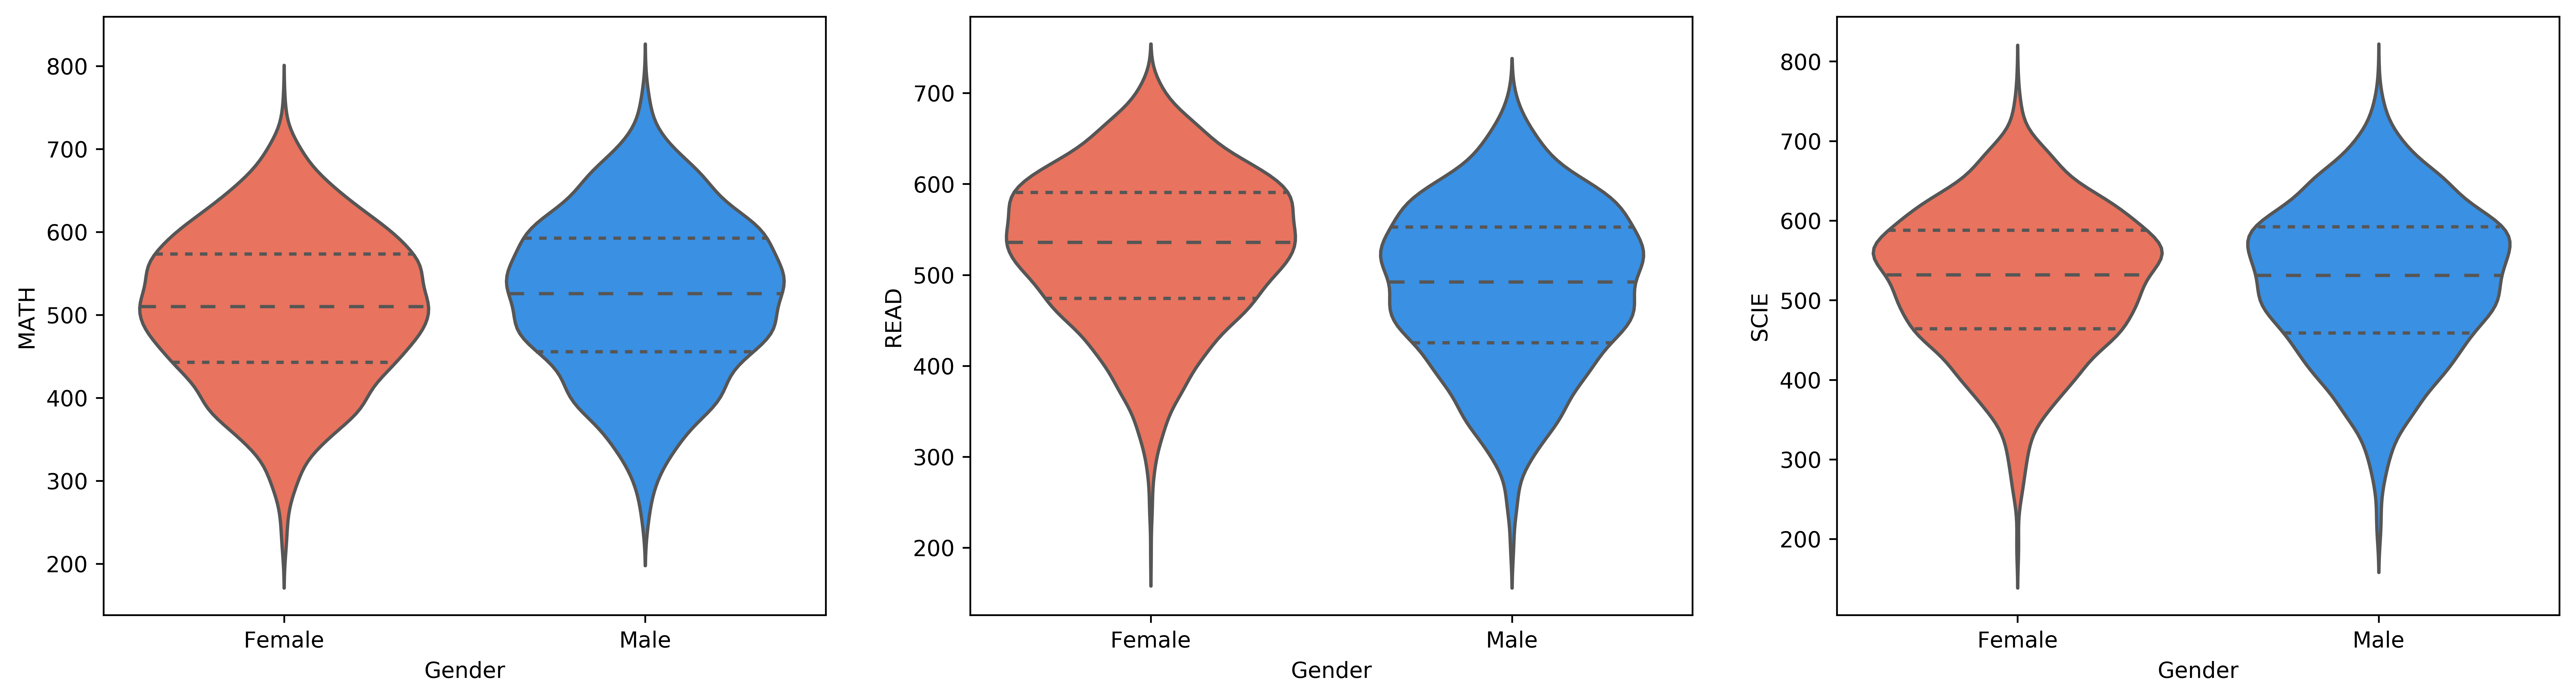

In [38]:
plt.figure(figsize=[20,5], dpi=600)

plt.subplot(1,3,1)

sb.violinplot(data = pisa_2012_Germany_df, x = 'ST04Q01', y='PV_MATH', inner= 'quartile', palette=['tomato','dodgerblue'])
plt.ylabel('MATH')
plt.xlabel('Gender')


plt.subplot(1,3,2)
sb.violinplot(data = pisa_2012_Germany_df, x = 'ST04Q01', y='PV_READ' , inner= 'quartile', palette=['tomato','dodgerblue'])
plt.ylabel('READ')
plt.xlabel('Gender')

plt.subplot(1,3,3)
sb.violinplot(data = pisa_2012_Germany_df, x = 'ST04Q01', y='PV_SCIE' , inner= 'quartile', palette=['tomato','dodgerblue'])
plt.ylabel('SCIE')
plt.xlabel('Gender')
plt.show()

**Let's check gender difference with the `box` plots.**

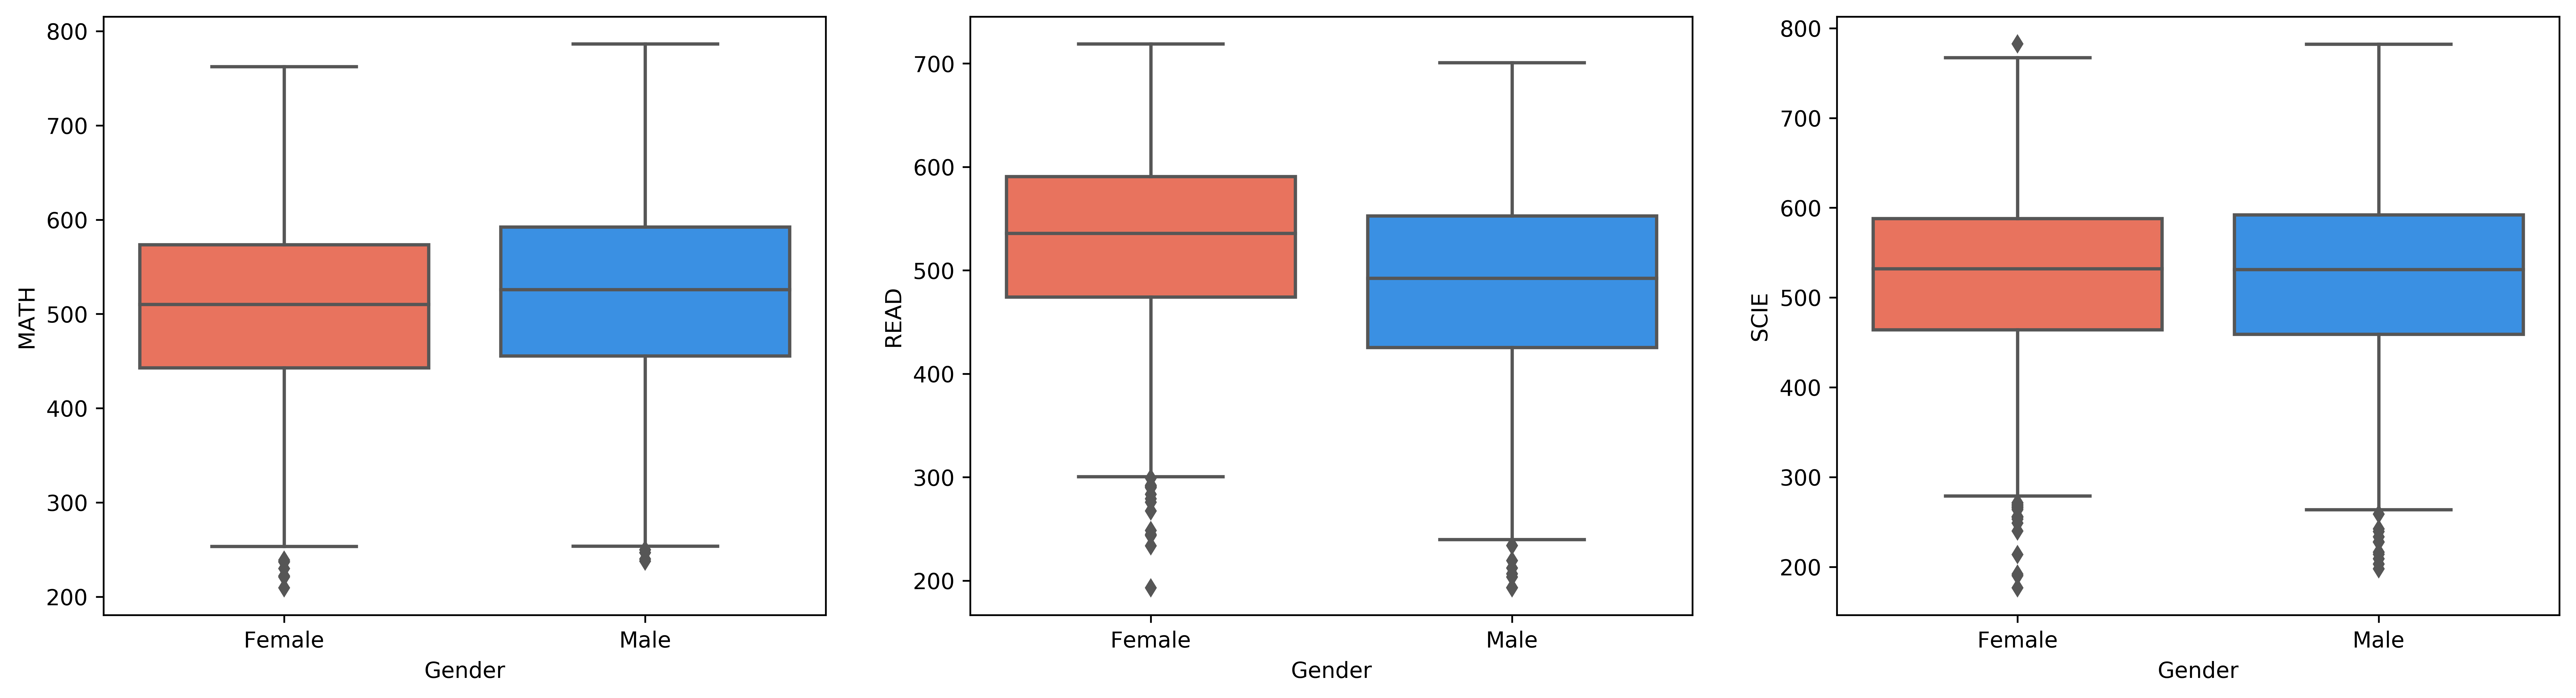

In [39]:
plt.figure(figsize=[20,5], dpi=600)

plt.subplot(1,3,1)

sb.boxplot(data = pisa_2012_Germany_df, x = 'ST04Q01', y='PV_MATH', palette=['tomato','dodgerblue'])
plt.ylabel('MATH')
plt.xlabel('Gender')


plt.subplot(1,3,2)
sb.boxplot(data = pisa_2012_Germany_df, x = 'ST04Q01', y='PV_READ', palette=['tomato','dodgerblue'])
plt.ylabel('READ')
plt.xlabel('Gender')

plt.subplot(1,3,3)
sb.boxplot(data = pisa_2012_Germany_df, x = 'ST04Q01', y='PV_SCIE', palette=['tomato','dodgerblue'])
plt.ylabel('SCIE')
plt.xlabel('Gender')
plt.show()

**(?) Is there dependance of teachers attitude on gender?**

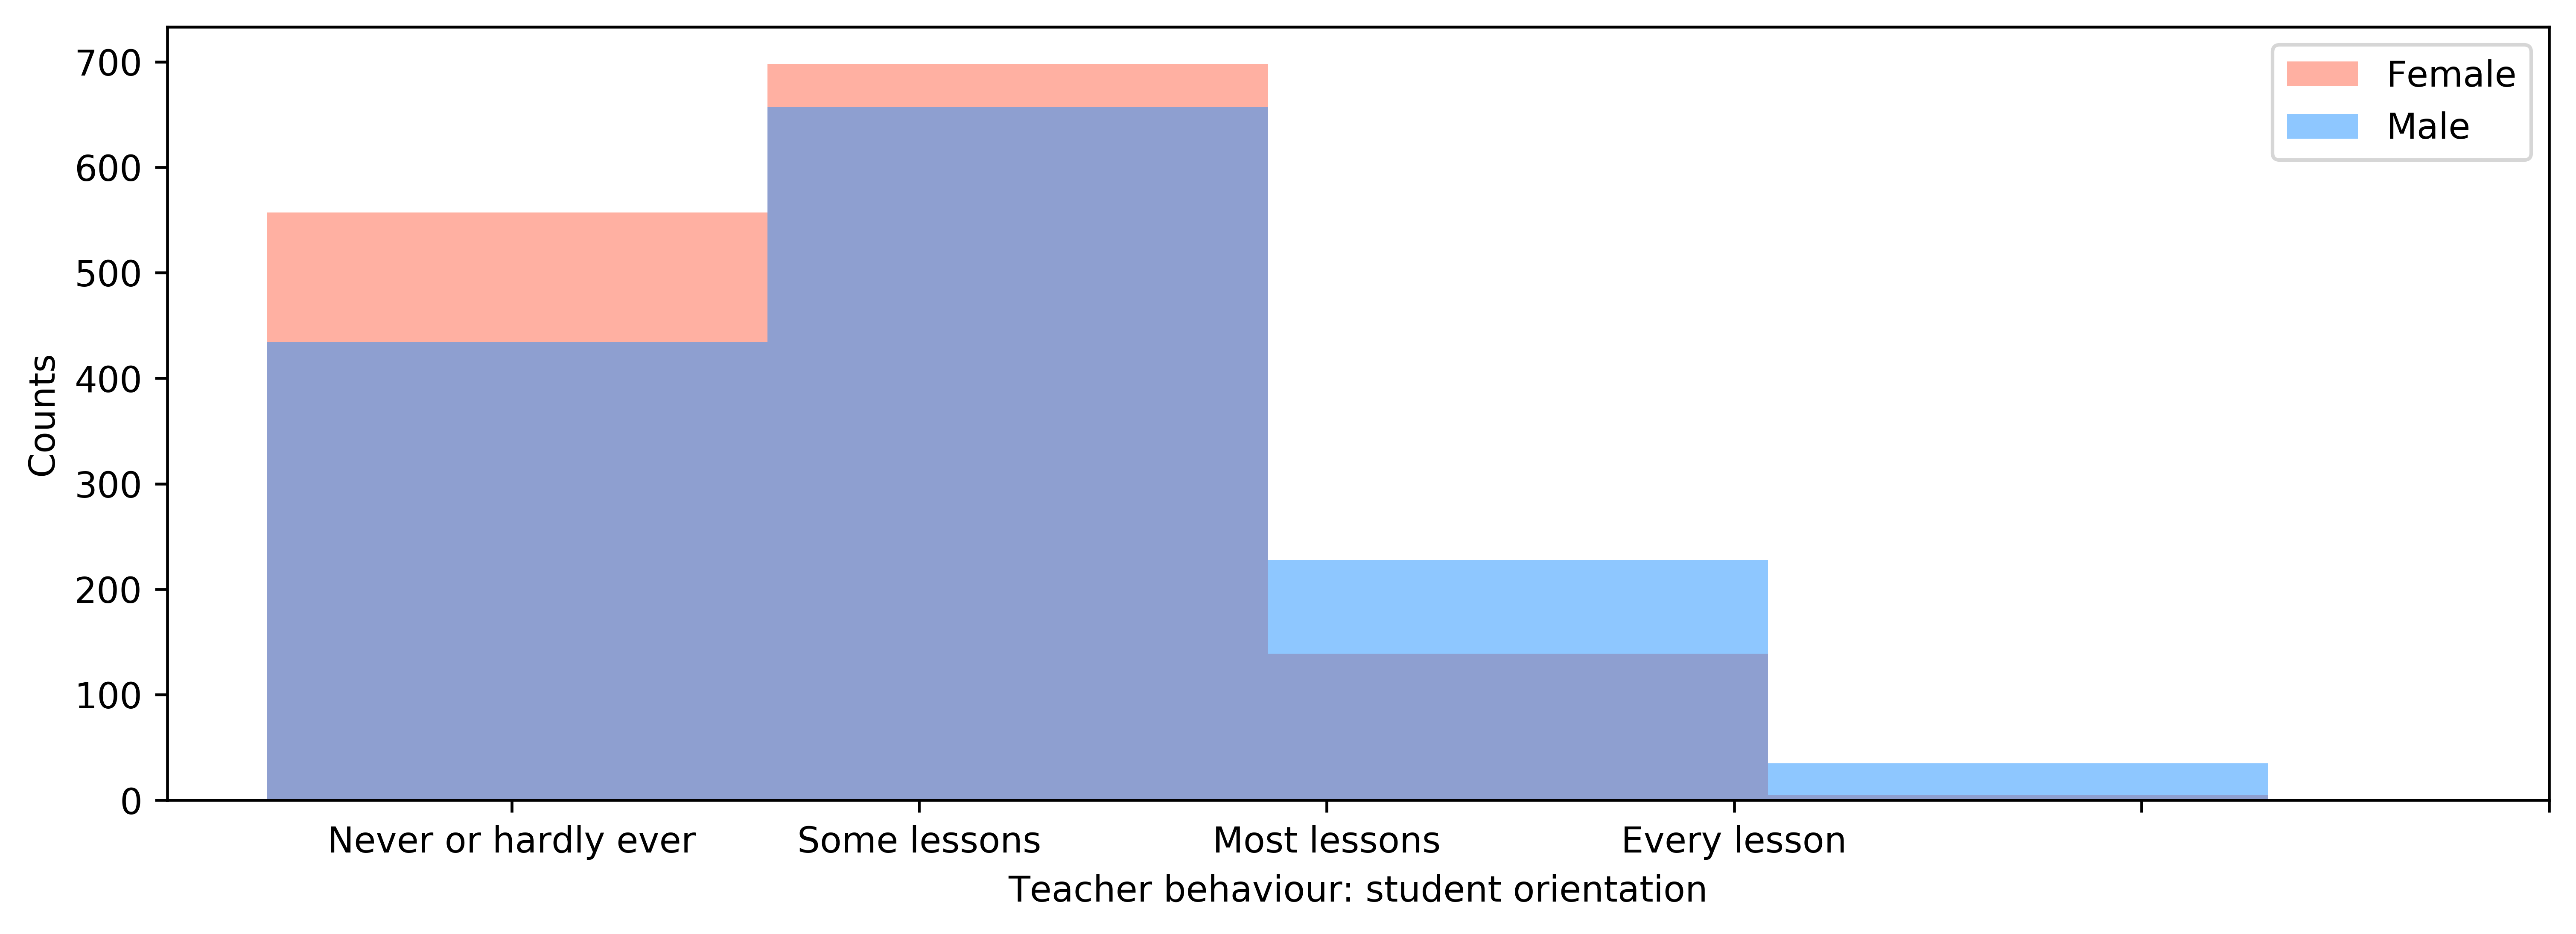

In [300]:
plt.figure(figsize = [12, 4], dpi = 600)
plt.hist(pisa_2012_Germany_fem_df.TCHBEHSO.dropna(), bins =4, alpha = 0.5, color = 'tomato', label='Female')
plt.hist(pisa_2012_Germany_mal_df.TCHBEHSO.dropna(), bins =4, alpha = 0.5, color = 'dodgerblue', label = 'Male')
plt.legend(prop={'size': 10})
plt.xticks(np.arange(-1,5), ('Never or hardly ever', 'Some lessons', 'Most lessons', 'Every lesson'))
plt.xlabel('Teacher behaviour: student orientation');
plt.ylabel('Counts');

**(!) It looks like teachers mostly ignore females.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
ST01Q01
7    International Grade
GRADE
411    Grade compared to modal grade in country
BFMJ2
417    Father SQ ISEI
BMMJ1
418    Mother SQ ISEI
ESCS
428    Index of economic, social and cultural status
HISEI
439    Highest parental occupational status
HOMEPOS
440    Home Possessions
OPENPS
470    Openness for Problem Solving
PARED
472    Highest parental education in years

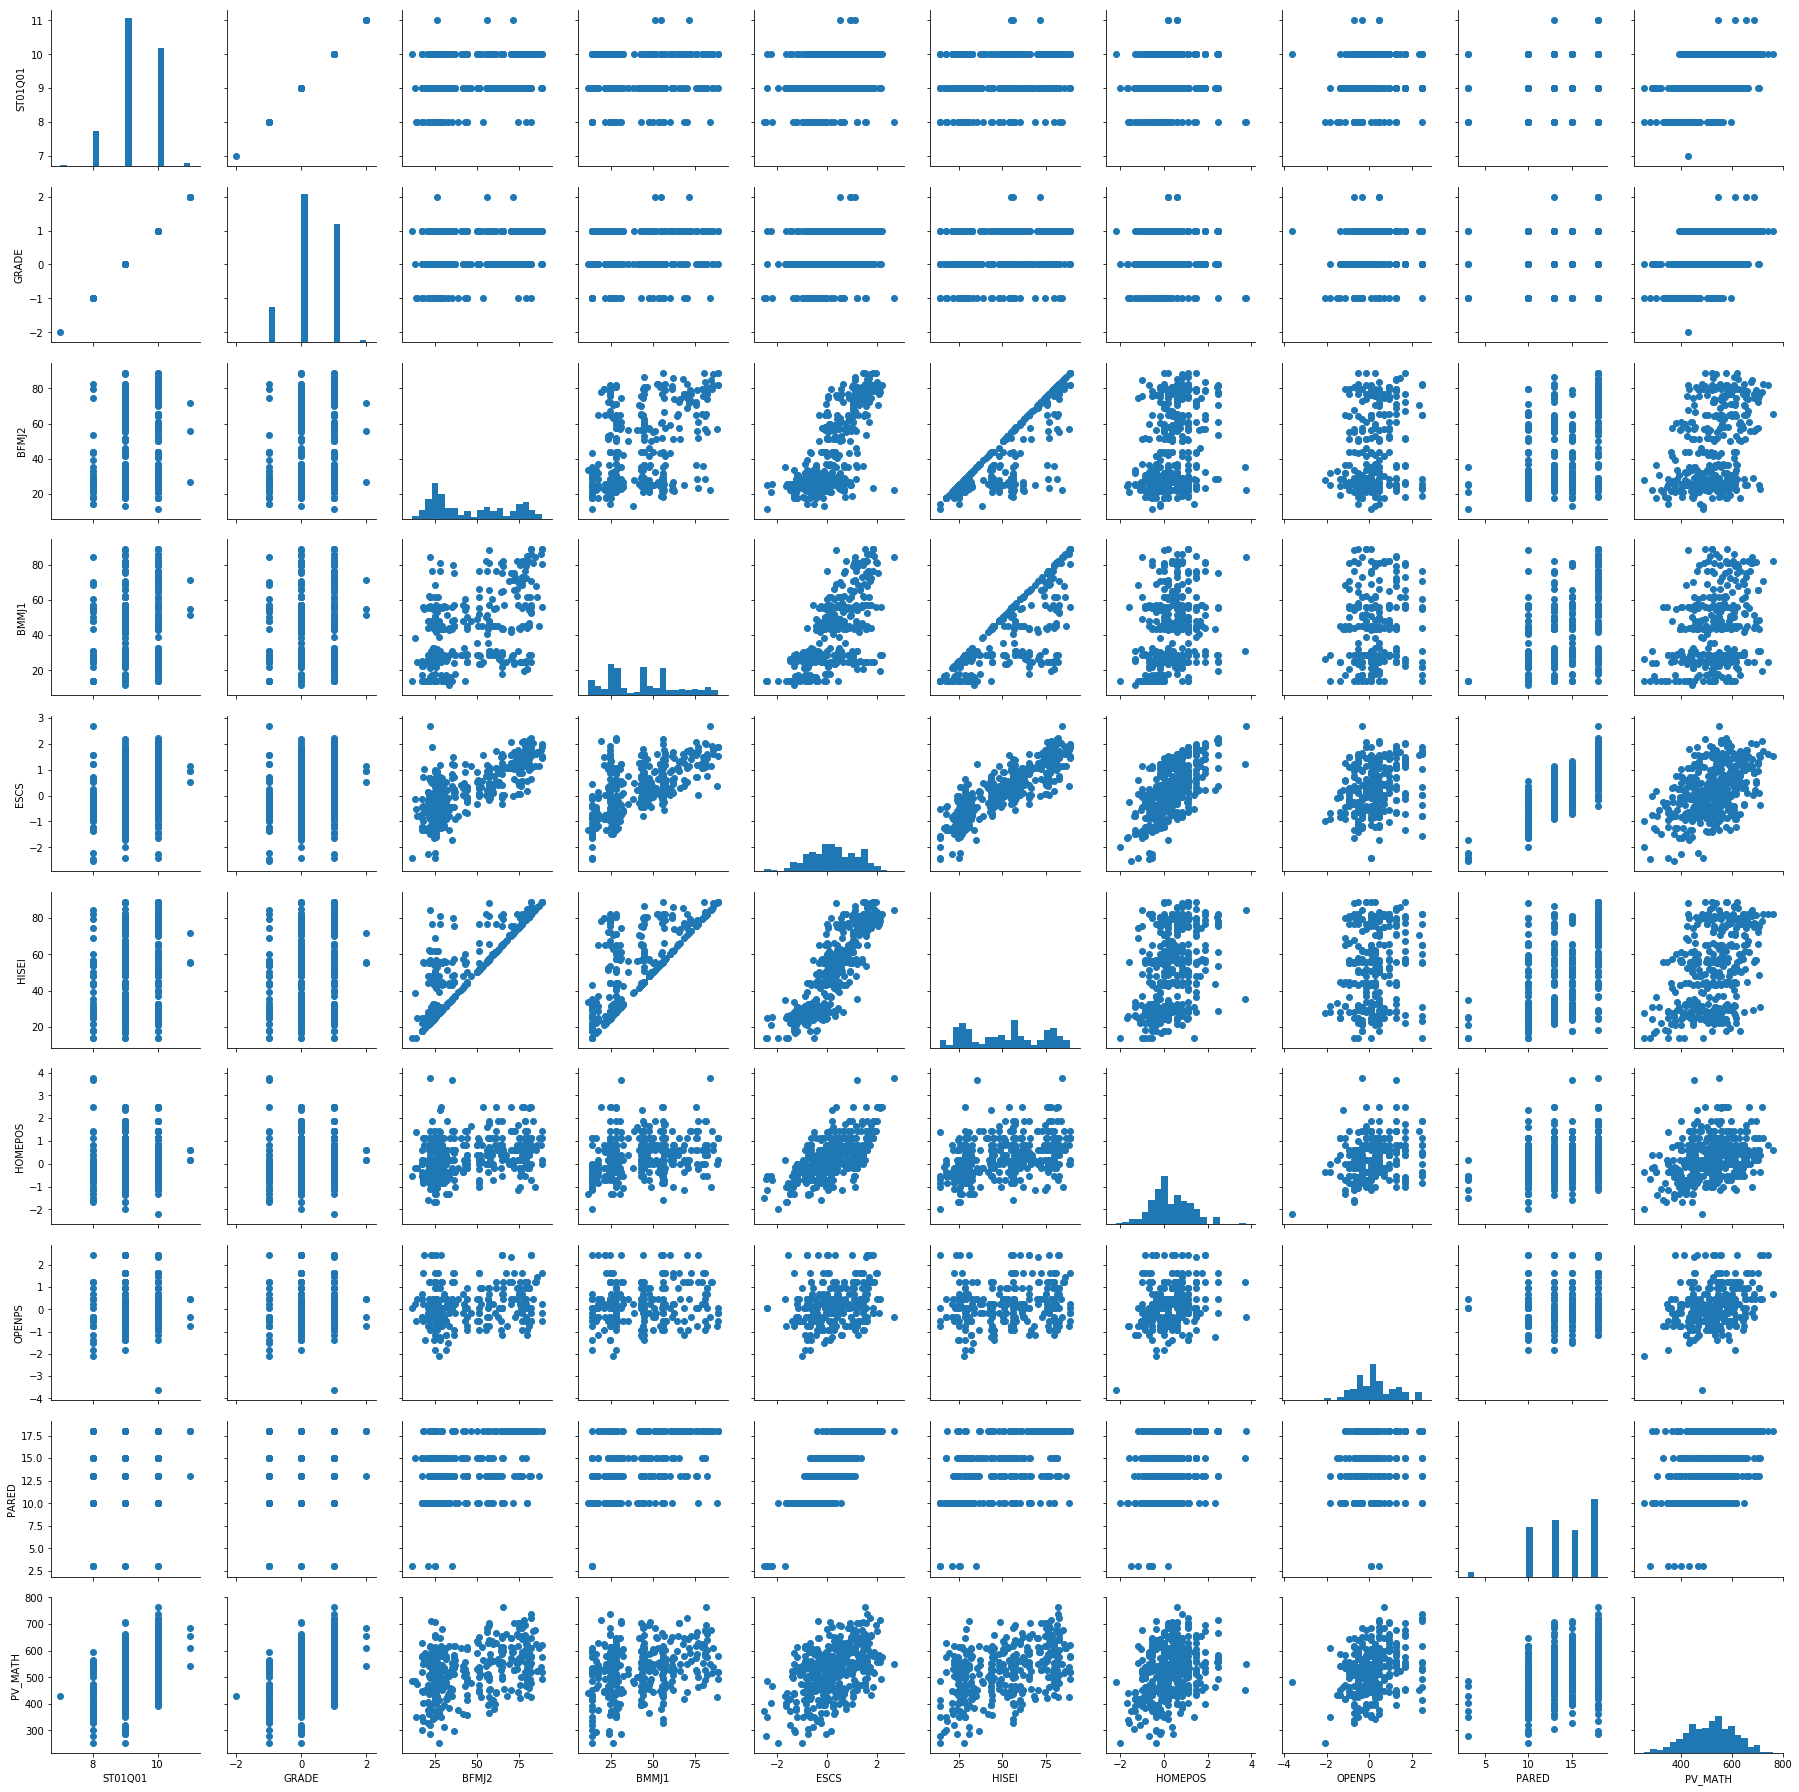

In [334]:
# Positive correlations
# list of numerical variables
num_vars_pos = ['ST01Q01', 'GRADE', 'BFMJ2', 'BMMJ1', 'ESCS', 'HISEI', 'HOMEPOS', 'OPENPS', 'PARED', 'PV_MATH']
#print(num_vars)
# plot matrix: sample 500 points starting from the first index for Germany 133102
samples = np.random.choice(pisa_2012_Germany_df.shape[0], 500, replace = False) + 133102
#print(samples)
pupil_samp = pisa_2012_Germany_df.loc[samples,:]
#print(pupil_samp)

g = sb.PairGrid(data = pupil_samp, vars = num_vars_pos)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

In [ ]:
ST06Q01
13    Age at <ISCED 1>
ST70Q01
174    No of <class period> p/wk - <test lang>
IC05Q01
303    Internet at School
IC06Q01
304    Internet out-of-school - Weekday
ANXMAT
413    Mathematics Anxiety
TCHBEHSO

In [329]:
pisa_2012_Germany_df.IC05Q01.value_counts()

1     2080
2     1224
97     807
3      400
4      181
99     121
5       91
7       36
6       32
98      29
Name: IC05Q01, dtype: int64

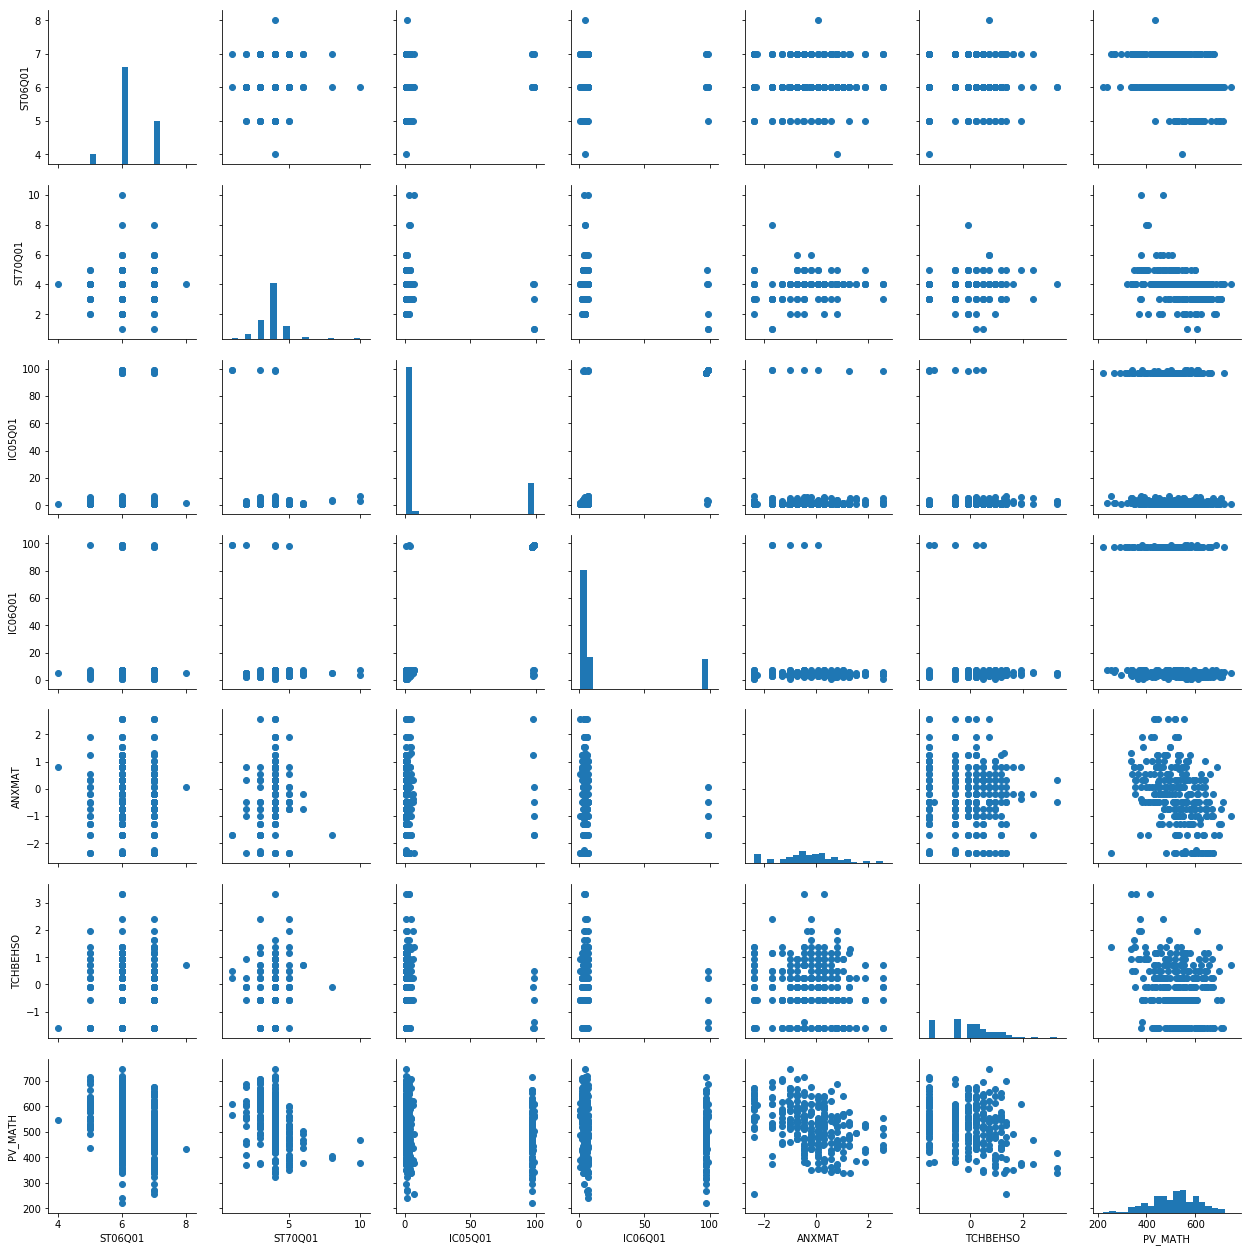

In [346]:
# Negative correlations
# list of numerical variables
num_vars_neg = ['ST06Q01', 'ST70Q01', 'IC05Q01', 'IC06Q01', 'ANXMAT', 'TCHBEHSO', 'PV_MATH']
#print(num_vars)
# plot matrix: sample 500 points starting from the first index for Germany 133102
samples = np.random.choice(pisa_2012_Germany_df.shape[0], 500, replace = False) + 133102
#print(samples)
pupil_samp = pisa_2012_Germany_df.loc[samples,:]
#print(pupil_samp)

g = sb.PairGrid(data = pupil_samp, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

**There is a problem with the IC05Q01 and IC06Q01. This is the number of half-hours of interenet at school and at home. The value 100 is too large and is isolated.**

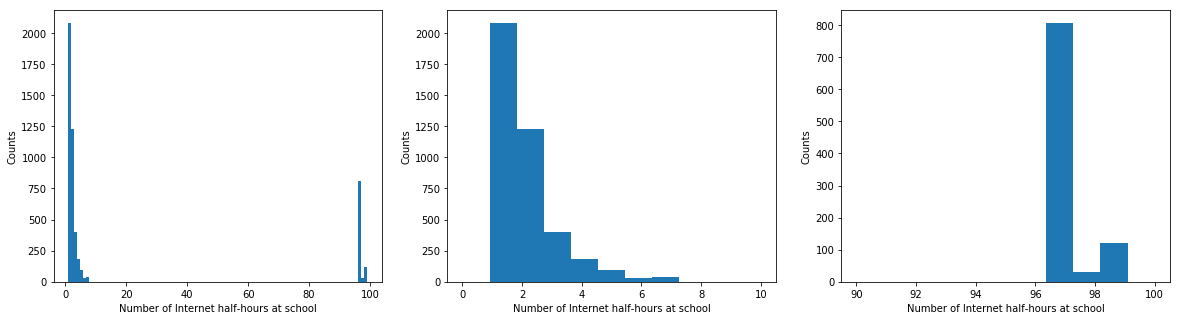

In [355]:
# Internet at School
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.hist(pisa_2012_Germany_df.IC05Q01, bins = 100)
plt.ylabel('Counts')
plt.xlabel('Number of Internet half-hours at school')

plt.subplot(1,3,2)
plt.hist(pisa_2012_Germany_df.IC05Q01, bins = 11, range=[0, 10])
plt.ylabel('Counts')
plt.xlabel('Number of Internet half-hours at school')

plt.subplot(1,3,3)
plt.hist(pisa_2012_Germany_df.IC05Q01, bins = 11, range=[90, 100])
plt.ylabel('Counts')
plt.xlabel('Number of Internet half-hours at school')

plt.show()

**(!) There are no counts between 7 and 97 and larger than 99. The largest counts >= 97 is 97 itself. The distribution of hours is peaked at the smallest number.**

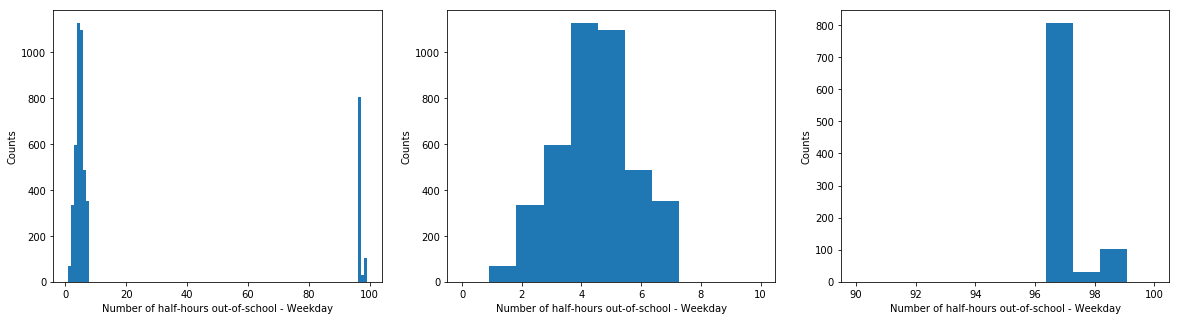

In [353]:
# Internet out-of-school - Weekday
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.hist(pisa_2012_Germany_df.IC06Q01, bins = 100)
plt.ylabel('Counts')
plt.xlabel('Number of Internet half-hours out-of-school - Weekday')

plt.subplot(1,3,2)
plt.hist(pisa_2012_Germany_df.IC06Q01, bins = 11, range=[0, 10])
plt.ylabel('Counts')
plt.xlabel('Number of Internet half-hours out-of-school - Weekday')

plt.subplot(1,3,3)
plt.hist(pisa_2012_Germany_df.IC06Q01, bins = 11, range=[90, 100])
plt.ylabel('Counts')
plt.xlabel('Number of Internet half-hours out-of-school - Weekday')

plt.show()

**(!) There are the same effects as for the internet at school, except for the form of the distribution. The distribution is peaked at 4 half-hours, and has a bell-like form.**

**Let's look at the pupils with 99 half-hours of internet at school.**

In [366]:
pisa_2012_Germany_df.loc[pisa_2012_Germany_df.IC05Q01 == 99].filter(num_vars_neg).sort_values('PV_MATH')#.dropna()

,ST06Q01,ST70Q01,IC05Q01,IC06Q01,ANXMAT,TCHBEHSO,PV_MATH
137545,NaN,NaN,99,99,NaN,1.1547,237.03848
134152,7.0,4.0,99,99,1.26,1.3823,284.08630
133236,8.0,4.0,99,5,1.89,0.4855,291.40832
136442,NaN,NaN,99,99,NaN,NaN,298.34090
137790,NaN,NaN,99,99,1.26,0.4855,299.97664
134572,6.0,NaN,99,99,-0.20,0.4855,314.30908
135234,6.0,NaN,99,99,NaN,NaN,319.52794
137541,6.0,4.0,99,3,1.26,-0.1057,322.87740
134153,7.0,NaN,99,99,NaN,NaN,331.60150
136983,7.0,NaN,99,99,NaN,0.2217,336.04144


**(?) How the number of hours was calculated?**

**(!) According to the [Report:](https://www.oecd.org/pisa/pisaproducts/PISA%202012%20Technical%20Report_ANNEX%20B%20%E2%80%93%20CONTRAST%20CODING%20USED%20IN%20CONDITIONING.pdf)** "...Items were recoded to represent numerical value in half-hours as
follows (‘01’=0), (‘02’=1), (‘03’=2), (‘04’=4), (‘05’=8), (‘06’=12),
(‘07’=18). Two dummy variables were created as follows:
Value value – median 0
Missing 0 1..."

**The calculation contains substraction. It seems that there was some error, and 1 was recorded as 100-1 = 99, 2 as 100-2 = 98, and 3 as 100-3 = 97. Let's check what happens if we replace back the numbers in this way.**

In [373]:
# Copy the data frame to a new one
pisa_2012_Germany_df_clean = pisa_2012_Germany_df.copy()

In [390]:
# Replace 99 with 1, 98 with 2 and 97 with 3 in IC05Q01 and IC06Q01 
pisa_2012_Germany_df_clean.IC05Q01.replace({99: 1, 98: 2, 97: 3}, inplace = True)
pisa_2012_Germany_df_clean.IC06Q01.replace({99: 1, 98: 2, 97: 3}, inplace = True)
#pisa_2012_Germany_df_clean.IC05Q01;

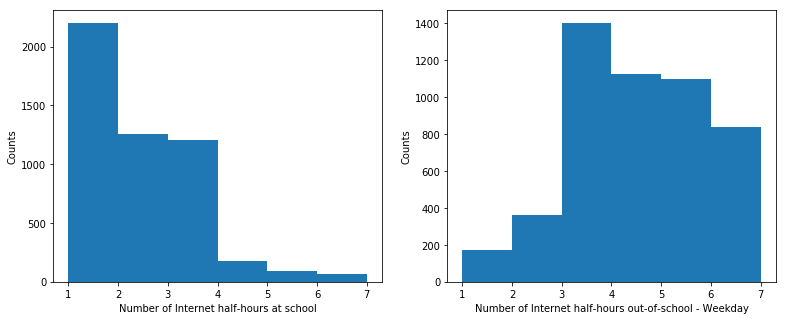

In [397]:
# Internet 
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.hist(pisa_2012_Germany_df_clean.IC05Q01, bins = 6)
plt.ylabel('Counts')
plt.xlabel('Number of Internet half-hours at school')

plt.subplot(1,3,2)
plt.hist(pisa_2012_Germany_df_clean.IC06Q01, bins = 6)
plt.ylabel('Counts')
plt.xlabel('Number of Internet half-hours out-of-school - Weekday')

plt.show()

**(!) Schools provide 1-2 hours of Internet, parents allow 2 and more hours if Internet.**

**(!) We have to recalculate correlations.**

In [399]:
# Re-calculate parwise correlations with PV%MATH
# `filter`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html
PV_columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']
pisa_2012_Germany_df_corr_clean = pisa_2012_Germany_df_clean.corr().filter(PV_columns).dropna()
# Add the average MATH_corr column
pisa_2012_Germany_df_corr_clean['MATH_corr'] = (pisa_2012_Germany_df_corr_clean.PV1MATH + 
                                                pisa_2012_Germany_df_corr_clean.PV2MATH +
                                                pisa_2012_Germany_df_corr_clean.PV3MATH + 
                                                pisa_2012_Germany_df_corr_clean.PV4MATH + 
                                                pisa_2012_Germany_df_corr_clean.PV5MATH)/5
# Drop the PV%MATH columns
pisa_2012_Germany_df_corr_clean = pisa_2012_Germany_df_corr_clean.drop(columns = PV_columns)
pisa_2012_Germany_df_corr_clean.head()

,MATH_corr
N_Pupil,-0.036658
SCHOOLID,-0.037144
STIDSTD,-0.036658
ST01Q01,0.458317
ST02Q01,-0.055447


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


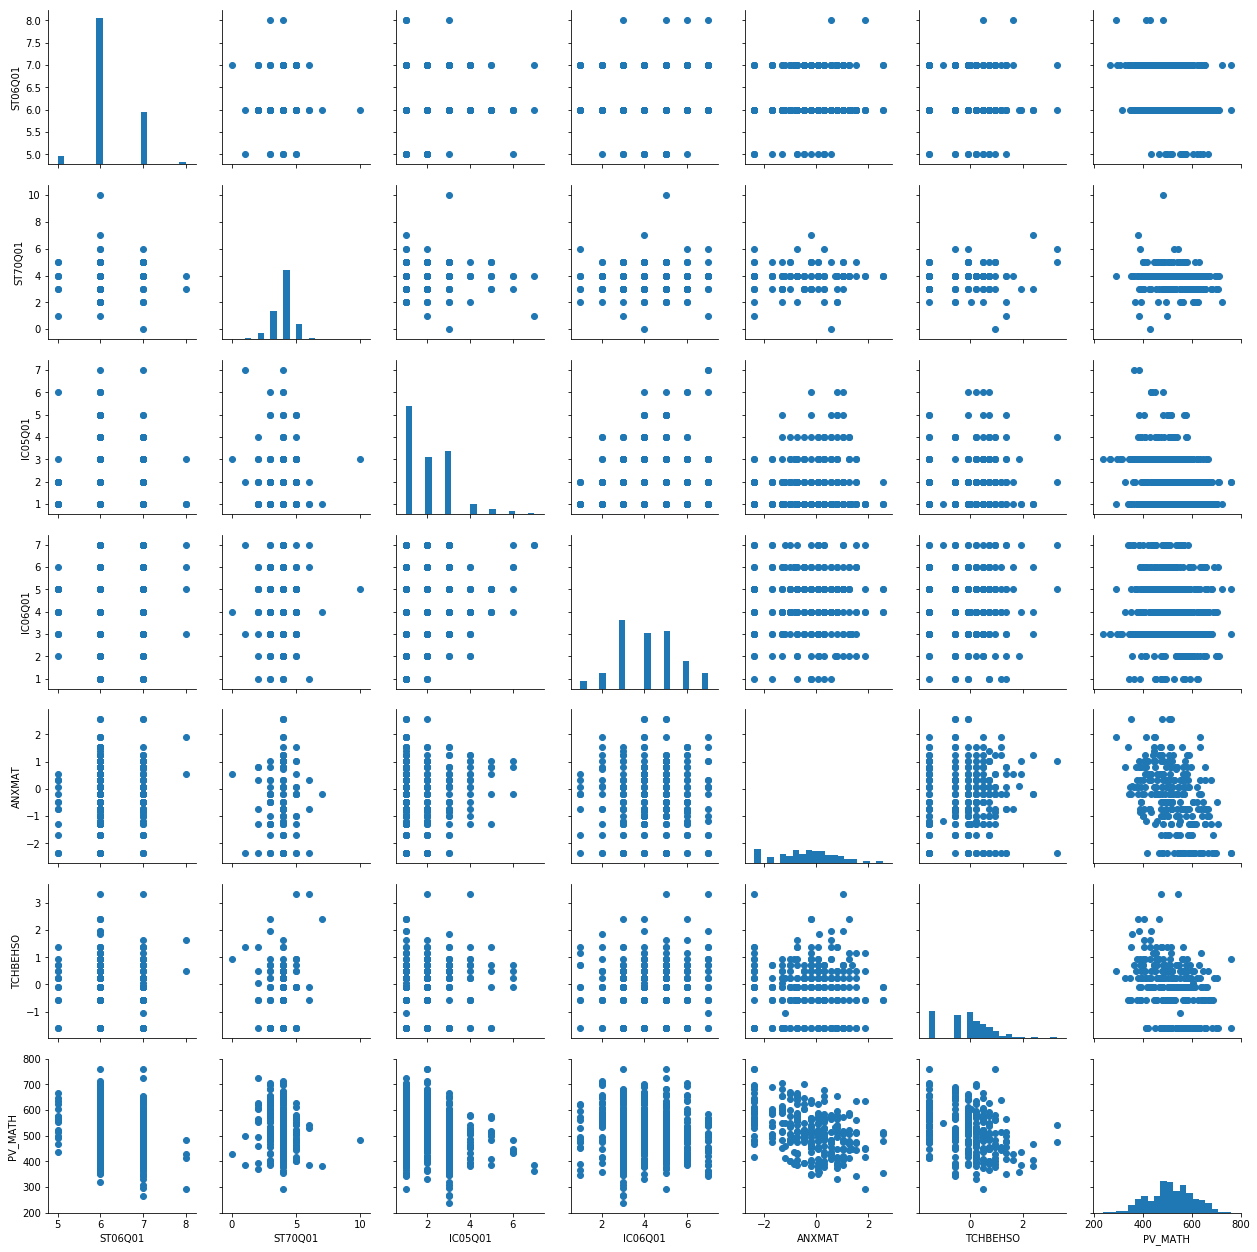

In [400]:
# Negative correlations in the cleaned dataset
# list of numerical variables
num_vars_neg = ['ST06Q01', 'ST70Q01', 'IC05Q01', 'IC06Q01', 'ANXMAT', 'TCHBEHSO', 'PV_MATH']
#print(num_vars)
# plot matrix: sample 500 points starting from the first index for Germany 133102
samples = np.random.choice(pisa_2012_Germany_df_clean.shape[0], 500, replace = False) + 133102
#print(samples)
pupil_samp = pisa_2012_Germany_df_clean.loc[samples,:]
#print(pupil_samp)

g = sb.PairGrid(data = pupil_samp, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

In [419]:
print('Internet at school')
print('before cleaning:',pisa_2012_Germany_df_corr.loc['IC05Q01'].to_string())
print('after cleaning:',pisa_2012_Germany_df_corr_clean.loc['IC05Q01'].to_string())

Internet at school
before cleaning: MATH_corr   -0.257505
after cleaning: MATH_corr   -0.252367


In [418]:
print('Internet at home')
print('before cleaning:',pisa_2012_Germany_df_corr.loc['IC06Q01'].to_string())
print('after cleaning:',pisa_2012_Germany_df_corr_clean.loc['IC06Q01'].to_string())

Internet at home
before cleaning: MATH_corr   -0.252846
after cleaning: MATH_corr   -0.004903


**(!) Internet at school is bad for math, but internet at home has no influence!**

In [348]:
# What is the range of values for ANXMAT - fear of Math?
pisa_2012_Germany_df.ANXMAT.describe()

count    2757.000000
mean       -0.282151
std         1.146017
min        -2.370000
25%        -1.000000
50%        -0.200000
75%         0.560000
max         2.550000
Name: ANXMAT, dtype: float64

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!